In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import event_detector_pipeline as edp

hydrophone_metadata = {
    'h1':{
        # start and end identifies the start time of the swarm where the amplitude magnitude is the highest
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
       # obspy_idx is the index within the stream for this data (all data is sorted from top to bottom of the borehole this way in lists)
        ,'obspy_idx':0
        # depth of the hydrophone
        ,'depth':30
        ,'velocity_model':1750
    }
    ,    'h2':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':1
        ,'depth':100        
        ,'velocity_model':1750

    }
    ,    'h3':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':2
        ,'depth':170        
        ,'velocity_model':1750

    }
    ,'h4':{
        'start':obspy.UTCDateTime('2019-05-21T07:48:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:07:00Z')
        ,'obspy_idx':3
        ,'depth':240
        ,'velocity_model':1750
    }
    ,'h5':{
        'start':obspy.UTCDateTime('2019-05-21T08:07:00Z')
        # ,'end':obspy.UTCDateTime('2019-5-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
        ,'obspy_idx':4
        ,'depth':310
        ,'velocity_model':1750
    }
    ,'h6':{
        'start':obspy.UTCDateTime('2019-05-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
       ,'obspy_idx':5
        ,'depth':380
        ,'velocity_model':1750
    }
}

In [2]:
# df = pd.read_csv('hmmm.csv')
df = pd.read_csv('precision.csv')

In [3]:
df

,Unnamed: 0,id,depth,aic_t,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt
0,0,0,418.500,"[18037.31817321759, 18037.3181718287, 18037.31...",5,4,18037.318172,2019-05-21 07:38:10.081000+00:00,2019-05-21 07:38:10.165000+00:00,-0.084
1,1,1,345.000,"[18037.318188935187, 18037.318188599536, 18037...",4,5,18037.318188,2019-05-21 07:38:11.403000+00:00,2019-05-21 07:38:11.403000+00:00,0.000
2,2,2,345.000,"[18037.31820296296, 18037.318202974537, 18037....",4,5,18037.318201,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,0.000
3,3,3,345.000,"[18037.3182190625, 18037.31821888889, 18037.31...",4,5,18037.318217,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,0.000
4,4,4,345.000,"[18037.31822136574, 18037.318221331017, 18037....",4,5,18037.318221,2019-05-21 07:38:14.253000+00:00,2019-05-21 07:38:14.253000+00:00,0.000
...,...,...,...,...,...,...,...,...,...,...
2236,2236,2236,380.875,"[18037.359563506947, 18037.35956349537, 18037....",5,4,18037.359564,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.328000+00:00,-0.041
2237,2237,2237,380.000,"[18037.35957045139, 18037.35957045139, 18037.3...",5,4,18037.359570,2019-05-21 08:37:46.887000+00:00,2019-05-21 08:37:46.927000+00:00,-0.040
2238,2238,2238,380.000,"[18037.359578136577, 18037.359578252315, 18037...",5,4,18037.359578,2019-05-21 08:37:47.558000+00:00,2019-05-21 08:37:47.598000+00:00,-0.040
2239,2239,2239,379.125,"[18037.35958925926, 18037.35958923611, 18037.3...",5,4,18037.359589,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.551000+00:00,-0.039


In [4]:
import matplotlib.dates as dates
print(dates.num2date(18037.346769))

2019-05-21 08:19:20.841600+00:00


In [5]:
df.sort_values(by='first_arrival', inplace=True)

In [6]:
from ast import literal_eval

df['aic_t'] = df.aic_t.apply(literal_eval)

In [7]:
(sorted([dates.num2date(t) for t in df.iloc[126].aic_t])[2] - sorted([dates.num2date(t) for t in df.iloc[126].aic_t])[3]).total_seconds()

-0.036

In [8]:
df.iloc[126]

Unnamed: 0                                                         126
id                                                                 126
depth                                                            173.5
aic_t                [18037.3200565625, 18037.3200565625, 18037.320...
first_hydrophone                                                     2
second_hydrophone                                                    3
arrival_time                                              18037.320057
first_arrival                         2019-05-21 07:40:52.887000+00:00
second_arrival                        2019-05-21 07:40:52.923000+00:00
dt                                                              -0.036
Name: 126, dtype: object

<AxesSubplot:>

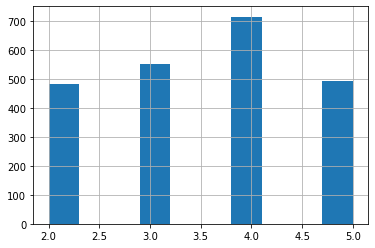

In [9]:
df.first_hydrophone.hist()

In [10]:
35 - 0.5 * (-0.036) * 1750 * (2-3) + 130

133.5

In [11]:
df.iloc[0]['aic_t']

[18037.31817321759,
 18037.3181718287,
 18037.31817347222,
 18037.318173993055,
 18037.31817320602,
 18037.318172233794]

In [12]:
df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)

In [13]:
df.depth.dropna()

0       418.500
1       345.000
2       345.000
3       345.000
4       345.000
         ...   
2236    380.875
2237    380.000
2238    380.000
2239    379.125
2240    377.375
Name: depth, Length: 2241, dtype: float64

<AxesSubplot:>

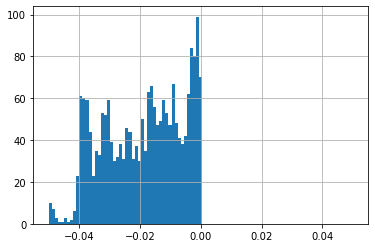

In [14]:
df.apply(lambda row: (dates.num2date(row['aic_t'][row['first_hydrophone']]) - dates.num2date(row['aic_t'][row['second_hydrophone']])).total_seconds(), axis=1).hist(bins=np.linspace(-0.05, 0.05, 100))

(400.0, 50.0)

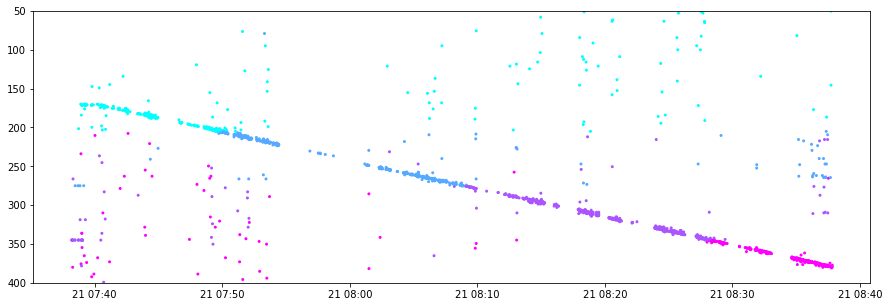

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
# df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

ax.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.first_hydrophone, cmap='cool')

ax.set_ylim(400, 50)

LinregressResult(slope=4353.202792307352, intercept=-78519920.7575573, rvalue=0.8415571252241868, pvalue=0.0, stderr=61.74322015969902, intercept_stderr=1113683.5159080673)


(400.0, 50.0)

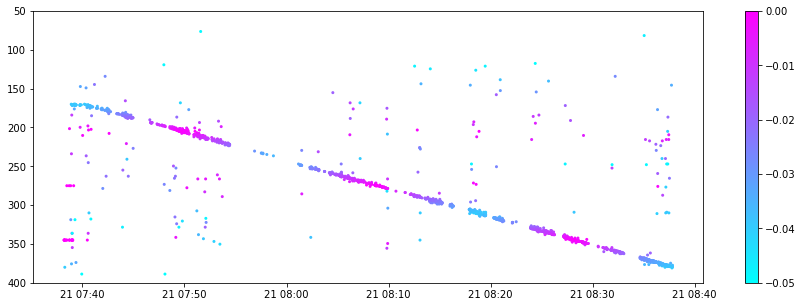

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
# df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

no_bad_picks = df[df.dt.between(-0.05, 0.05)]

cbar = ax.scatter(no_bad_picks.arrival_datetime, no_bad_picks.depth, marker='.', linewidth=0, c=no_bad_picks.dt, cmap='cool')
fig.colorbar(cbar)

import scipy.stats as stats

lr = stats.linregress(x=no_bad_picks.arrival_time, y=no_bad_picks.depth)
print(lr)
x = np.linspace(df.arrival_time.min(), df.arrival_time.max(), 1000)
y = lr.slope * x + 150
# x = np.array([dates.num2date(t) for t in x])

ax.plot(x, y)

ax.set_ylim(400, 50)

In [17]:
np.argsort(df.aic_t[251])

array([0, 1, 2, 3, 4, 5])

LinregressResult(slope=0.056612038943003644, intercept=173.48848820249975, rvalue=0.9434784899610543, pvalue=0.0, stderr=0.0004538610633186641, intercept_stderr=1.0209122390595111)


(-250.0, 4200.0)

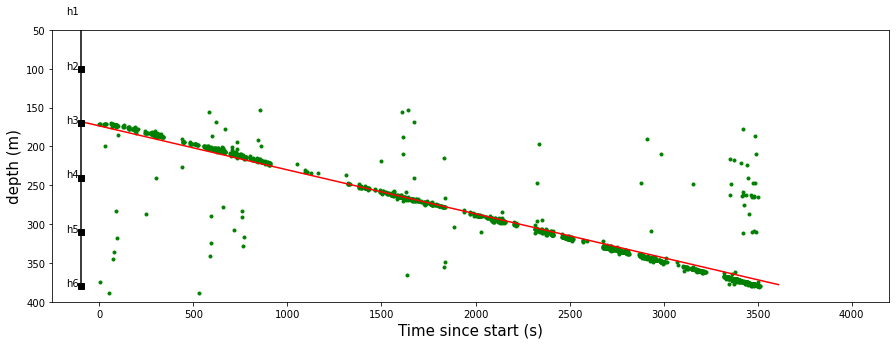

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_ylabel('depth (m)', fontsize=15)
ax.set_xlabel('Time since start (s)', fontsize=15)

data = df[df.depth.between(150, 400)].copy()
# data = df.copy()#[df.depth.between(150, 350)].copy()
data['diff'] = data.first_hydrophone - data.second_hydrophone
data = data[data['diff'].between(-1, 1)].copy()
data = data[50:]

x = data.first_arrival.astype('datetime64').reset_index().first_arrival
t_total = []
# for t in x:
#     for t2 in x[1:]:
#         print((t2 - t).total_seconds())
#         t_total.append((t2 -t).total_seconds())
for n, t in enumerate(x[1:]):
    n += 1
    t_total.append((t - x[n-1]).total_seconds())
    
t_total = np.array(t_total)
t_total = t_total.cumsum()

# y = data.depth
yz = data.depth

# ax.plot(t_total, y[:-1], marker='.', linewidth=0, color='limegreen')

colors = {-3:'red', -2:'yellow', -1:'green',  1:'green',  2:'yellow',  3:'red'}
clrs = [colors[c] for c in (data.first_hydrophone - data.second_hydrophone).values]

for t, y, c in zip(t_total, yz[:-1], clrs):
    ax.plot(t, y, marker='.', linewidth=0, c=c)

# lr = stats.linregress(t_total, y[:-1])
lr = stats.linregress(t_total, yz[:-1])
print(lr)

xmod = np.linspace(t_total.min()-100, t_total.max()+100, 1000)
ymod = lr.slope * xmod + lr.intercept

ax.plot(xmod, ymod, color='red')
ax.set_ylim(400, 50)

depths = []
n = 1
for k in hydrophone_metadata.keys():
    d = hydrophone_metadata[k]['depth']
    depths.append(d)
    ax.text(s='h{n}'.format(n=n), x=-175, y=d)
    n += 1
    
ax.plot((-100,)*len(depths), depths, color='black', marker='s')

ax.set_xlim(-250, 4200)

In [19]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
waveforms = load.import_corrected_data_for_single_day(paths=paths)
swarm_starttime = obspy.UTCDateTime('2019-05-21T07:30:00')
swarm_endtime = obspy.UTCDateTime('2019-05-21T08:38:30')
waveforms = waveforms.trim(starttime=swarm_starttime, endtime=swarm_endtime)

In [20]:
times = []
datas = []
for tr in reversed(waveforms):
    times.append(tr.times())
    datas.append(tr.data)

2220.0

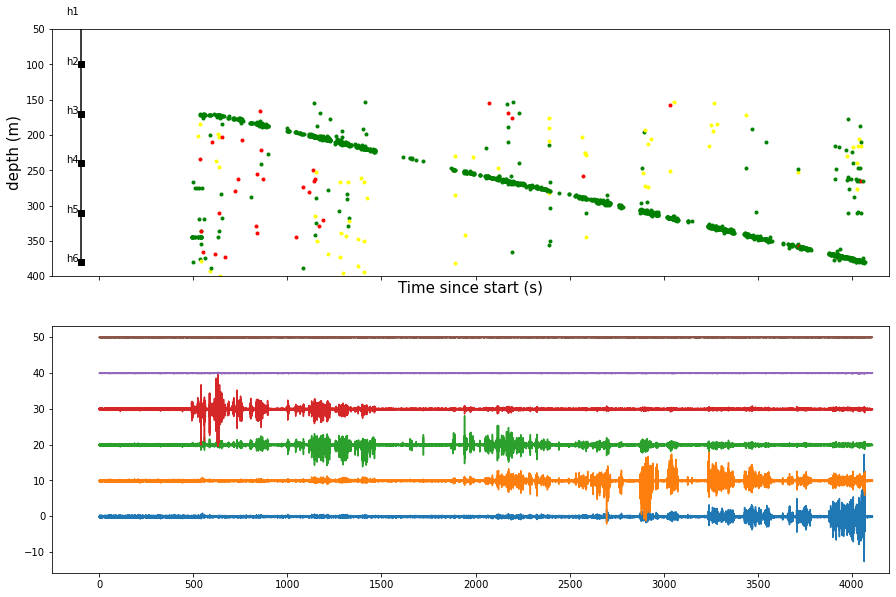

In [21]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

n=0
for t, d in zip(times, datas):
    ax2.plot(t, d+10*n)
    n+=1

ax.set_ylabel('depth (m)', fontsize=15)
ax.set_xlabel('Time since start (s)', fontsize=15)

data = df[df.depth.between(150, 400)].copy()
# data['diff'] = data.first_hydrophone - data.second_hydrophone
# data = data[data['diff'].between(-1, 1)].copy()
# data = data[50:]

# calculates event time in seconds from beginning
t_total = pd.to_datetime(data.first_arrival).apply(obspy.UTCDateTime) - swarm_starttime

# x = data.first_arrival.astype('datetime64').reset_index().first_arrival
# t_total = []

# for n, t in enumerate(x[1:]):
#     n += 1
#     t_total.append((t - x[n-1]).total_seconds())
    
# t_total = np.array(t_total)
# t_total = t_total.cumsum()

yz = data.depth

colors = {-3:'red', -2:'yellow', -1:'green',  1:'green',  2:'yellow',  3:'red'}
clrs = [colors[c] for c in (data.first_hydrophone - data.second_hydrophone).values]

for t, y, c in zip(t_total, yz[:-1], clrs):
    ax.plot(t, y, marker='.', linewidth=0, c=c)

# plot the best fit line
# lr = stats.linregress(t_total, yz[:-1])
# lr = stats.linregress(t_total, yz)
# print(lr)

# xmod = np.linspace(t_total.min()-100, t_total.max()+100, 1000)
# ymod = lr.slope * xmod + lr.intercept

# ax.plot(xmod, ymod, color='red')
ax.set_ylim(400, 50)

# plot the hydrophones on the left
depths = []
n = 1
for k in hydrophone_metadata.keys():
    d = hydrophone_metadata[k]['depth']
    depths.append(d)
    ax.text(s='h{n}'.format(n=n), x=-175, y=d)
    n += 1
    
ax.plot((-100,)*len(depths), depths, color='black', marker='s')

ax.set_xlim(-250, 4200)

4110.0 - (swarm_endtime - obspy.UTCDateTime('2019-05-21T08:07:00Z'))

In [22]:
data

,Unnamed: 0,id,depth,aic_t,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,arrival_datetime
1,1,1,345.000,"[18037.318188935187, 18037.318188599536, 18037...",4,5,18037.318188,2019-05-21 07:38:11.403000+00:00,2019-05-21 07:38:11.403000+00:00,0.000,2019-05-21 07:38:11.403000+00:00
2,2,2,345.000,"[18037.31820296296, 18037.318202974537, 18037....",4,5,18037.318201,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,0.000,2019-05-21 07:38:12.603000+00:00
3,3,3,345.000,"[18037.3182190625, 18037.31821888889, 18037.31...",4,5,18037.318217,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,0.000,2019-05-21 07:38:13.973000+00:00
4,4,4,345.000,"[18037.31822136574, 18037.318221331017, 18037....",4,5,18037.318221,2019-05-21 07:38:14.253000+00:00,2019-05-21 07:38:14.253000+00:00,0.000,2019-05-21 07:38:14.253000+00:00
5,5,5,345.000,"[18037.31823087963, 18037.318230891204, 18037....",4,5,18037.318229,2019-05-21 07:38:15.004000+00:00,2019-05-21 07:38:15.004000+00:00,0.000,2019-05-21 07:38:15.004000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
2236,2236,2236,380.875,"[18037.359563506947, 18037.35956349537, 18037....",5,4,18037.359564,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.328000+00:00,-0.041,2019-05-21 08:37:46.287000+00:00
2237,2237,2237,380.000,"[18037.35957045139, 18037.35957045139, 18037.3...",5,4,18037.359570,2019-05-21 08:37:46.887000+00:00,2019-05-21 08:37:46.927000+00:00,-0.040,2019-05-21 08:37:46.887000+00:00
2238,2238,2238,380.000,"[18037.359578136577, 18037.359578252315, 18037...",5,4,18037.359578,2019-05-21 08:37:47.558000+00:00,2019-05-21 08:37:47.598000+00:00,-0.040,2019-05-21 08:37:47.558000+00:00
2239,2239,2239,379.125,"[18037.35958925926, 18037.35958923611, 18037.3...",5,4,18037.359589,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.551000+00:00,-0.039,2019-05-21 08:37:48.512000+00:00


In [23]:
df.iloc[750]

Unnamed: 0                                                         750
id                                                                 750
depth                                                           252.25
aic_t                [18037.335085162038, 18037.335085162038, 18037...
first_hydrophone                                                     3
second_hydrophone                                                    4
arrival_time                                              18037.335085
first_arrival                         2019-05-21 08:02:31.358000+00:00
second_arrival                        2019-05-21 08:02:31.384000+00:00
dt                                                              -0.026
arrival_datetime                      2019-05-21 08:02:31.358000+00:00
Name: 750, dtype: object

In [24]:
id = 2000
dfe = df.iloc[id]
e = edp.Event(id=id, starttime=dfe.init_arrival_time, init_first_hphone=dfe.arrival_hydrophone, waveforms=waveforms)

AttributeError: 'Series' object has no attribute 'init_arrival_time'

In [ ]:
e.first_hydrophone_id

In [ ]:
e.second_hydrophone_id

In [ ]:
e.plot('waveforms')

In [ ]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
waveforms = load.import_corrected_data_for_single_day(paths=paths)
waveforms.plot()

In [ ]:
swarm_starttime = obspy.UTCDateTime('2019-05-21T07:30:00')
swarm_endtime = obspy.UTCDateTime('2019-05-21T08:38:30')
swarm_endtime - swarm_starttime

In [ ]:
# estimate velocities for different hydrophones

data[data.first_hydrophone==5].dt.hist(bins=50)

In [ ]:
df['diff'] = df.first_hydrophone - df.second_hydrophone

In [ ]:
df['diff'].unique()

In [ ]:
# make function to step through waveform plots

In [ ]:
df['ones'] = 1

fig, ax = plt.subplots(figsize=(15, 5))
df.set_index('first_arrival').ones.cumsum().plot(ax=ax,)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ones = np.ones_like(t_total)

# ax.plot(t_total, ones.cumsum())

x = data.first_arrival
y = np.ones_like(x).cumsum()

ax.plot(x, y)
ax.set_xticks([])

In [ ]:
x

In [ ]:
x = data.first_arrival.astype('datetime64').reset_index().first_arrival
t_total = []
# for t in x:
#     for t2 in x[1:]:
#         print((t2 - t).total_seconds())
#         t_total.append((t2 -t).total_seconds())
for n, t in enumerate(x[1:]):
    n += 1
    t_total.append((t - x[n-1]).total_seconds())
    
t_total = np.array(t_total)
plt.hist(t_total)